In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler

In [2]:
players_fifa = pd.read_csv('Fifa 23 Players Data Final.csv')
players = players_fifa[['Full Name', 'Overall', 'Potential', 'Value',
       'Positions Played','Best Position', 'Nationality', 'Age','Club Name', 'Wage', 'Release Clause', 'Club Position',
       'Contract Until']]

#We create a subset with only the players that play for Real Madrid, so we can analize our team

Real_Madrid = players[players['Club Name'] == 'Real Madrid CF']
Real_Madrid

,Full Name,Overall,Potential,Value,Positions Played,Best Position,Nationality,Age,Club Name,Wage,Release Clause,Club Position,Contract Until
1,Karim Benzema,91,91,64000000,"CF,ST",CF,France,34,Real Madrid CF,450000,131199999,CF,2023
6,Thibaut Courtois,90,91,90000000,GK,GK,Belgium,30,Real Madrid CF,250000,191300000,GK,2026
28,Toni Kroos,88,88,72000000,CM,CM,Germany,32,Real Madrid CF,310000,147600000,CM,2023
29,Luka Modrić,88,88,29000000,CM,CM,Croatia,36,Real Madrid CF,230000,59500000,CM,2023
30,Antonio Rüdiger,87,88,73500000,CB,CB,Germany,29,Real Madrid CF,250000,156200000,CB,2026
46,David Alaba,86,86,55500000,CB,CB,Austria,30,Real Madrid CF,220000,113800000,CB,2026
63,Vinícius José de Oliveira Júnior,86,92,109000000,LW,LW,Brazil,21,Real Madrid CF,200000,245300000,LW,2025
104,Daniel Carvajal Ramos,84,84,36500000,RB,RB,Spain,30,Real Madrid CF,185000,74800000,RB,2025
119,Eden Hazard,84,84,35000000,LW,LW,Belgium,31,Real Madrid CF,220000,71800000,SUB,2024
133,Éder Gabriel Militão,84,89,57500000,CB,CB,Brazil,24,Real Madrid CF,160000,122200000,SUB,2025


In [3]:
#We decided to sell our oldest players, so we filter our Real_Madrid DataFrame to find the players who are older than 30.
Real_Madrid[Real_Madrid['Age'] > 30]

#We also take a look at their wages.
Real_Madrid[['Full Name', 'Wage']].sort_values(by='Wage', ascending= False).head(7)

,Full Name,Wage
1,Karim Benzema,450000
28,Toni Kroos,310000
30,Antonio Rüdiger,250000
6,Thibaut Courtois,250000
29,Luka Modrić,230000
46,David Alaba,220000
119,Eden Hazard,220000


In [4]:
#We start the search of our now players, filterting the dataset with the following conditions and we save the result in a new DataFrame.

possible_transfers = players[players['Positions Played'].isin(['LW', 'LW,CAM','LW,LM','LW,ST']) & (players['Age'] < 25) & (players['Age'] > 20) & (players['Potential'] >= 85)]

#Since we only want to analize the top 10 players, we update our DataFrame with only the top 10 players.

possible_transfers = possible_transfers.head(10)

#We create a new column called 'Transfer Index' where we can see how good the pontential of each player is compare to their Release Clause

possible_transfers['Transfer Index'] = possible_transfers['Potential'] / possible_transfers['Release Clause']

#We sort the data by this index and we pick the first player.

possible_transfers.sort_values(by='Transfer Index', ascending = False)

,Full Name,Overall,Potential,Value,Positions Played,Best Position,Nationality,Age,Club Name,Wage,Release Clause,Club Position,Contract Until,Transfer Index
1284,Khvicha Kvaratskhelia,76,88,18500000,"LW,CAM",CAM,Georgia,21,Napoli,37000,35200000,LW,2027,2.500000e-06
377,Luis Sinisterra,80,86,33500000,"LW,LM",LW,Colombia,23,Leeds United,48000,70400000,RM,2027,1.221591e-06
321,Marcus Rashford,81,85,37000000,"LW,ST",ST,England,24,Manchester United,120000,73100000,ST,2023,1.162791e-06
173,Cody Gakpo,83,87,52000000,LW,RM,Netherlands,23,PSV,29000,76700000,LW,2026,1.134289e-06
231,Ferran Torres García,82,88,49000000,"LW,ST",LW,Spain,22,FC Barcelona,150000,110300000,SUB,2027,7.978241e-07
125,Federico Chiesa,84,90,66500000,LW,RM,Italy,24,Juventus,140000,126400000,SUB,2025,7.120253e-07
128,Rafael da Conceição Leão,84,90,66500000,"LW,LM",LW,Portugal,23,AC Milan,90000,126400000,LW,2024,7.120253e-07
63,Vinícius José de Oliveira Júnior,86,92,109000000,LW,LW,Brazil,21,Real Madrid CF,200000,245300000,LW,2025,3.750510e-07


In [19]:
# Select the feature columns from the 'players' DataFrame
X = players[['Overall', 'Potential', 'Value', 'Age', 'Release Clause']]

# Create a StandardScaler to standardize the feature data
scaler = StandardScaler()

# Standardize the feature data using the StandardScaler
X_standardized = scaler.fit_transform(X)

# Select the data for the player named 'Kvaratskhelia'
Kvaratskhelia = X_standardized[1284]

# Reshape the 'Kvaratskhelia' data to match the shape of the other data
Kvaratskhelia = pd.DataFrame(Kvaratskhelia).transpose()

# Remove the 'Kvaratskhelia' data from the standardized feature matrix
X_standardized = np.delete(X_standardized, 1284, axis=0)

# Select the target column 'Wage' from the 'players' DataFrame
y = players[['Wage']]

# Remove the 'Kvaratskhelia' row from the target data
y = y.drop(1284)

# Create a Linear Regression model
model = linear_model.LinearRegression()

# Fit the Linear Regression model to the standardized features and target
result = model.fit(X_standardized, y)

#Finally we predict the wage of our player
predicted_wage = model.predict(Kvaratskhelia)

print(predicted_wage)


[[42400.42623384]]


In [6]:
# Pick players for CM positions according to expected conditions
fifa_data_performance_CM = players_fifa[(players_fifa['Overall' ]>85) & (players_fifa['Age' ]<28) & (players_fifa['Club Name'] !='Real Madrid CF')&(players_fifa['Best Position']=='CM')]
fifa_data_performance_CM

,Known As,Full Name,Overall,Potential,Value,Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
38,T. Alexander-Arnold,Trent Alexander-Arnold,87,90,100500000,RB,CM,England,https://cdn.sofifa.net/players/231/281/23_60.png,23,...,86,88,86,87,87,87,86,81,86,22
41,L. Goretzka,Leon Goretzka,87,88,91000000,"CM,CDM",CM,Germany,https://cdn.sofifa.net/players/209/658/23_60.png,27,...,86,88,86,85,87,85,85,86,85,22
42,F. de Jong,Frenkie de Jong,87,92,116500000,CM,CM,Netherlands,https://cdn.sofifa.net/players/228/702/23_60.png,25,...,88,89,88,86,87,86,85,81,85,21
58,N. Barella,Nicolò Barella,86,89,89500000,CM,CM,Italy,https://cdn.sofifa.net/players/224/232/23_60.png,25,...,86,88,86,86,87,86,85,81,85,22
64,S. Milinković-Savić,Sergej Milinković-Savić,86,87,77500000,CM,CM,Serbia,https://cdn.sofifa.net/players/223/848/23_60.png,27,...,84,87,84,83,86,83,82,84,82,21


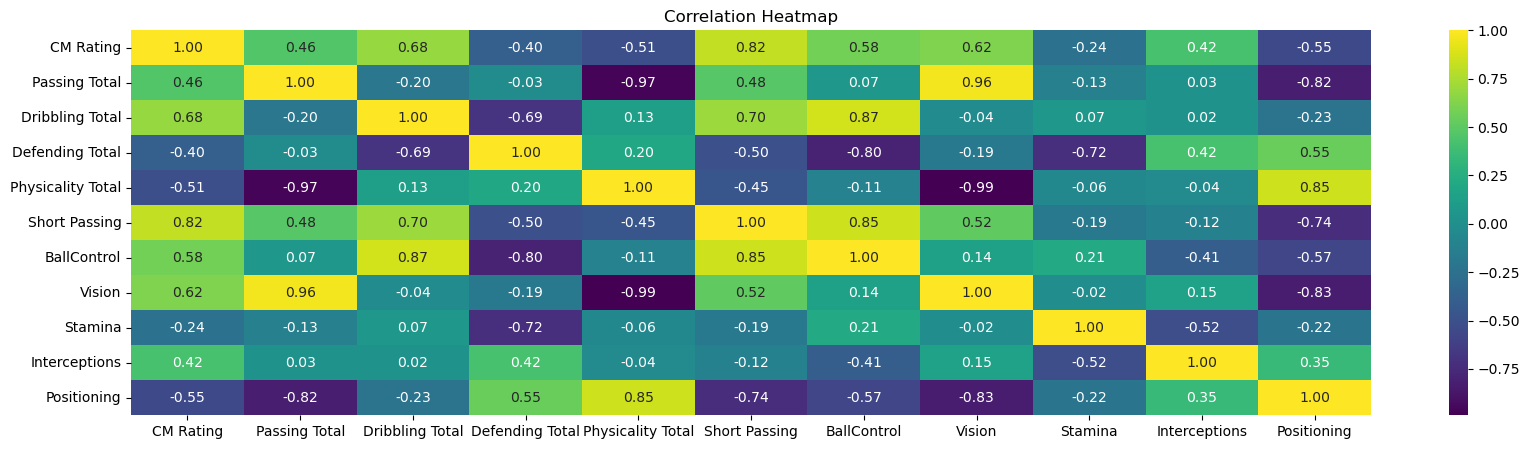

In [7]:
# Data with more related columns
CM_selected = fifa_data_performance_CM[['Full Name','CM Rating',"Passing Total", "Dribbling Total", "Defending Total", "Physicality Total", "Short Passing", "BallControl", "Vision", "Stamina", "Interceptions", "Positioning"]]

numeric_data = CM_selected.select_dtypes(include='number').corr()
plt.figure(figsize=(20, 5))
sns.heatmap(numeric_data,annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

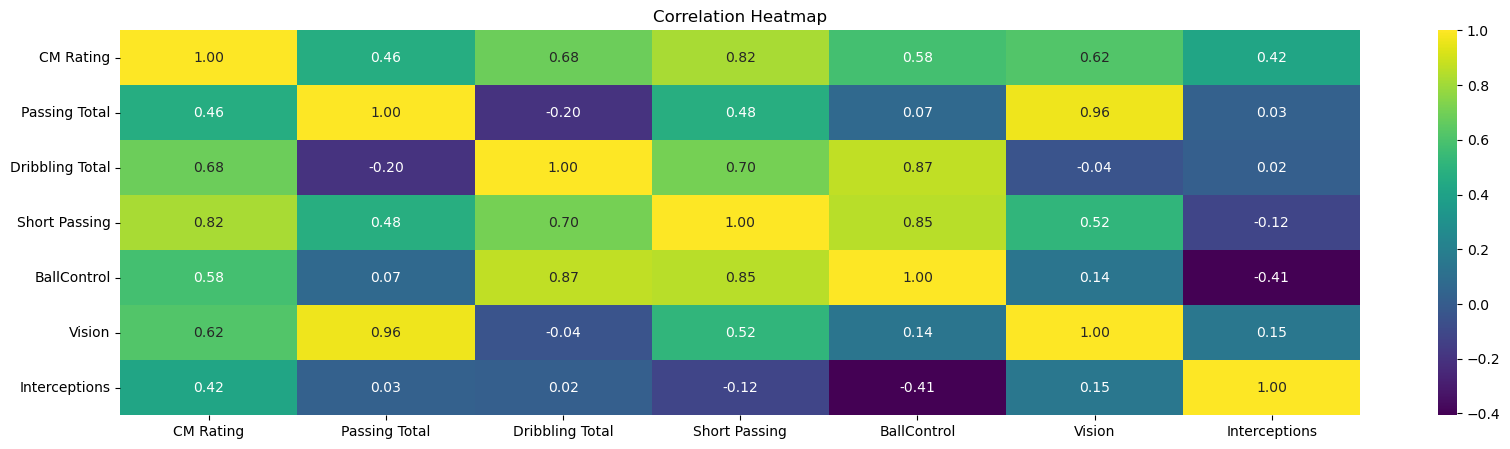

In [8]:
# Data with more refined skills from previous findings above
CM_selected_second = fifa_data_performance_CM[['Full Name','CM Rating',"Passing Total", "Dribbling Total", "Short Passing",'BallControl', "Vision", "Interceptions"]]

numeric_data_second = CM_selected_second.select_dtypes(include='number').corr()
plt.figure(figsize=(20, 5))
sns.heatmap(numeric_data_second,annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [9]:
# Display results by ordered price per performance ratio
 
CM_selected_second['Total CM skills'] = CM_selected["Passing Total"]+ CM_selected["Dribbling Total"]+ CM_selected ["Short Passing"] + CM_selected['BallControl'] + CM_selected["Vision"] + CM_selected["Interceptions"]
CM_selected_second["Release Clause"] = fifa_data_performance_CM["Release Clause"]
CM_selected_second['Release Clause/Total CM skills'] = CM_selected_second['Release Clause']/CM_selected_second['Total CM skills']
sorted_CM = CM_selected_second.sort_values(by='Release Clause/Total CM skills')
display(sorted_CM)

/var/folders/q5/5zcd6_2115553r1tvx9_1vk40000gn/T/ipykernel_46860/3463164043.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CM_selected_second['Total CM skills'] = CM_selected["Passing Total"]+ CM_selected["Dribbling Total"]+ CM_selected ["Short Passing"] + CM_selected['BallControl'] + CM_selected["Vision"] + CM_selected["Interceptions"]
/var/folders/q5/5zcd6_2115553r1tvx9_1vk40000gn/T/ipykernel_46860/3463164043.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CM_selected_second["Release Clause"] = f

,Full Name,CM Rating,Passing Total,Dribbling Total,Short Passing,BallControl,Vision,Interceptions,Total CM skills,Release Clause,Release Clause/Total CM skills
64,Sergej Milinković-Savić,87,82,82,86,87,83,79,499,137600000,275751.503006
58,Nicolò Barella,88,83,84,86,87,86,83,509,154400000,303339.882122
41,Leon Goretzka,88,82,83,86,86,84,86,507,157000000,309664.694280
38,Trent Alexander-Arnold,88,89,80,87,86,90,83,515,193500000,375728.155340
42,Frenkie de Jong,89,86,87,91,89,88,82,523,247600000,473422.562141


In [10]:
# Top three players
sorted_CM.head(3)

,Full Name,CM Rating,Passing Total,Dribbling Total,Short Passing,BallControl,Vision,Interceptions,Total CM skills,Release Clause,Release Clause/Total CM skills
64,Sergej Milinković-Savić,87,82,82,86,87,83,79,499,137600000,275751.503006
58,Nicolò Barella,88,83,84,86,87,86,83,509,154400000,303339.882122
41,Leon Goretzka,88,82,83,86,86,84,86,507,157000000,309664.694280


In [11]:
# Predicted Wage for our player choice
X = players_fifa[['Overall','Potential','Value','Age','Release Clause']]
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
Sergej  = X_standardized[64]
Sergej  = pd.DataFrame(Sergej).transpose()
X_standardized = np.delete(X_standardized, 64, axis=0)
y = players_fifa[['Wage']]
y = y.drop(64)
model = linear_model.LinearRegression()
result = model.fit(X_standardized,y)
# display(result.intercept_)
# display(result.coef_)
print(result.score(X_standardized,y))
predicted_wage = model.predict(Sergej)
print(predicted_wage)

0.7078734901633654
[[158739.95189682]]


In [12]:
# Checking the end of contract day
sorted_CM["Contract Until"] = fifa_data_performance_CM["Contract Until"]
sorted_CM

,Full Name,CM Rating,Passing Total,Dribbling Total,Short Passing,BallControl,Vision,Interceptions,Total CM skills,Release Clause,Release Clause/Total CM skills,Contract Until
64,Sergej Milinković-Savić,87,82,82,86,87,83,79,499,137600000,275751.503006,2024
58,Nicolò Barella,88,83,84,86,87,86,83,509,154400000,303339.882122,2026
41,Leon Goretzka,88,82,83,86,86,84,86,507,157000000,309664.694280,2026
38,Trent Alexander-Arnold,88,89,80,87,86,90,83,515,193500000,375728.155340,2025
42,Frenkie de Jong,89,86,87,91,89,88,82,523,247600000,473422.562141,2026


In [13]:
# Pick players for ST position with expected conditions
fifa_data_ST = players_fifa[(players_fifa['Age'] < 25) &
                            (players_fifa['Overall'] > 70) &
                            (players_fifa['Overall'] < 90) &
                            (players_fifa['Positions Played'].isin (['ST','CF,ST','ST,LW','RW,ST']))]


fifa_data_ST

,Known As,Full Name,Overall,Potential,Value,Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
21,E. Haaland,Erling Haaland,88,94,148000000,ST,ST,Norway,https://cdn.sofifa.net/players/239/085/23_60.png,21,...,80,76,80,65,67,65,64,65,64,22
59,L. Martínez,Lautaro Martínez,86,90,98500000,ST,ST,Argentina,https://cdn.sofifa.net/players/231/478/23_60.png,24,...,83,79,83,68,69,68,66,65,66,22
127,J. Tartt,Jamie Tartt,84,91,85500000,ST,CAM,England,https://cdn.sofifa.net/players/269/761/23_60.png,24,...,85,79,85,61,59,61,56,49,56,20
139,João Félix,João Félix Sequeira,84,90,68500000,"CF,ST",CAM,Portugal,https://cdn.sofifa.net/players/242/444/23_60.png,22,...,85,81,85,67,65,67,63,56,63,23
152,D. Vlahović,Dušan Vlahović,84,91,86500000,ST,ST,Serbia,https://cdn.sofifa.net/players/246/430/23_60.png,22,...,79,73,79,58,56,58,55,50,55,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4087,Pedro Mendes,Pedro Manuel Mineiro Mendes,71,78,3800000,ST,ST,Portugal,https://cdn.sofifa.net/players/254/824/23_60.png,22,...,66,61,66,52,52,52,51,52,51,17
4105,S. Ferreira,Sebastián Ferreira,71,78,3800000,ST,ST,Paraguay,https://cdn.sofifa.net/players/244/832/23_60.png,24,...,68,64,68,52,51,52,50,47,50,17
4139,Kaio Jorge,Kaio Jorge Pinto Ramos,71,82,4099999,ST,ST,Brazil,https://cdn.sofifa.net/players/260/644/23_60.png,20,...,71,63,71,52,49,52,49,43,49,17
4203,Rômulo Calsede,Rômulo Roberto Calsede Caiado,71,71,2200000,ST,ST,Brazil,https://cdn.sofifa.net/players/234/028/23_60.png,22,...,69,65,69,53,52,53,51,47,51,21


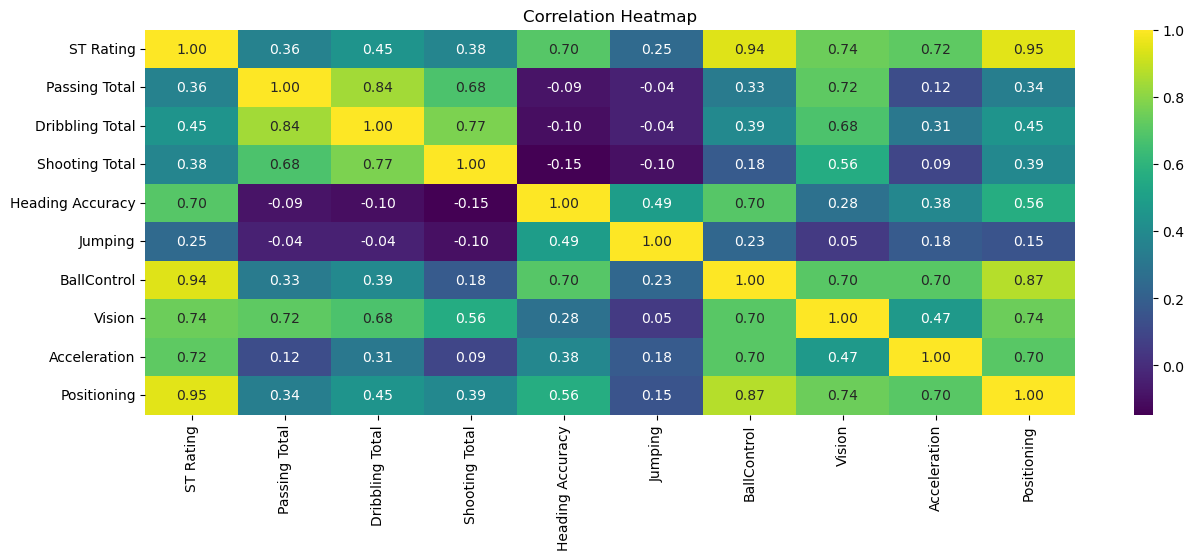

In [14]:
# Filter out data with necessary columns for ST position
filter_ST = players_fifa[['Full Name', 'ST Rating', "Passing Total", "Dribbling Total", "Shooting Total", "Heading Accuracy", "Jumping", "BallControl", "Vision", "Acceleration", "Positioning"]]

numeric_data = filter_ST.select_dtypes(include='number').corr()
plt.figure(figsize=(15, 5))
sns.heatmap(numeric_data,annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [15]:
# Sort players with Release Clause per ST point ratio
total_column = filter_ST.select_dtypes(include='number').sum(axis=1)
filter_ST["Total ST Point"] = total_column
filter_ST["Release Clause"] = players_fifa["Release Clause"]
filter_ST['Ratio Column'] = filter_ST['Release Clause']/filter_ST['Total ST Point']
sorted_ST = filter_ST.sort_values(by='Ratio Column')
display(sorted_ST)

/var/folders/q5/5zcd6_2115553r1tvx9_1vk40000gn/T/ipykernel_46860/3656996819.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_ST["Total ST Point"] = total_column
/var/folders/q5/5zcd6_2115553r1tvx9_1vk40000gn/T/ipykernel_46860/3656996819.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_ST["Release Clause"] = players_fifa["Release Clause"]
/var/folders/q5/5zcd6_2115553r1tvx9_1vk40000gn/T/ipykernel_46860/3656996819.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

,Full Name,ST Rating,Passing Total,Dribbling Total,Shooting Total,Heading Accuracy,Jumping,BallControl,Vision,Acceleration,Positioning,Total ST Point,Release Clause,Ratio Column
9217,Chang Hoon Kwon,66,65,70,64,57,56,70,67,68,67,650,0,0.000000
6565,Janis Antiste,70,51,69,69,64,73,72,50,79,65,662,0,0.000000
6568,Dario Vizinger,70,54,67,70,67,62,69,68,72,67,666,0,0.000000
6572,Imanol García de Albéniz,57,65,65,47,57,55,65,61,66,54,592,0,0.000000
6575,Josh Koroma,66,60,69,64,43,57,70,61,85,63,638,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,Pedro González López,76,81,87,67,50,65,88,88,82,77,761,261000000,342969.776610
21,Erling Haaland,90,65,80,91,79,74,82,74,82,89,806,303400000,376426.799007
22,Gianluigi Donnarumma,37,79,89,83,12,72,30,60,50,14,526,199200000,378707.224335
6,Thibaut Courtois,34,75,90,89,13,68,23,44,42,13,491,191300000,389613.034623


In [16]:
# check first 6 players
sorted_ST.head(6)

,Full Name,ST Rating,Passing Total,Dribbling Total,Shooting Total,Heading Accuracy,Jumping,BallControl,Vision,Acceleration,Positioning,Total ST Point,Release Clause,Ratio Column
9217,Chang Hoon Kwon,66,65,70,64,57,56,70,67,68,67,650,0,0.0
6565,Janis Antiste,70,51,69,69,64,73,72,50,79,65,662,0,0.0
6568,Dario Vizinger,70,54,67,70,67,62,69,68,72,67,666,0,0.0
6572,Imanol García de Albéniz,57,65,65,47,57,55,65,61,66,54,592,0,0.0
6575,Josh Koroma,66,60,69,64,43,57,70,61,85,63,638,0,0.0
6579,Jarrad Branthwaite,51,45,52,31,70,74,62,27,61,25,498,0,0.0


In [17]:
fifa_data_ST['fifa_data_ST Index'] = fifa_data_ST['Potential'] / fifa_data_ST['Release Clause']
players_fifa.loc[:, 'fifa_data_23 Index'] = players_fifa['Potential'] / players_fifa['Release Clause']

/var/folders/q5/5zcd6_2115553r1tvx9_1vk40000gn/T/ipykernel_46860/4266713152.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifa_data_ST['fifa_data_ST Index'] = fifa_data_ST['Potential'] / fifa_data_ST['Release Clause']


In [18]:
# Predicted wage for ST position
X = players_fifa [['Overall','Potential','Value','Age','Release Clause']]
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
Tammya = X_standardized[220]
Tammya = pd.DataFrame(Tammya).transpose()
X_standardized = np.delete(X_standardized, 220, axis=0)
y = players_fifa [['Wage']]
y = y.drop(220)
model = linear_model.LinearRegression()
result = model.fit(X_standardized, y)
predicted_wage = model.predict(Tammya)
print(predicted_wage)

[[89282.8489338]]
